## INTRODUCTION

In this project, we will implement logistic regression algrotithm without Sklearn Logistic Rregression library. 

*  [Reading csv](#read_data)
*  [Checking first 10 data for look features](#data_head)
*  [Checking correlation between features](#cor)
*  [Checking data types](#data_info)
*  [Converting the feature to int](#convert)
*  [Normalization](#normalization)
*  [Splitting data to train and test](#split)
*  [Inıtalizing parameters](#int)
*  [Implementing sigmoid function](#sigmoid)
*  [Implementing forward propagation](#forward)
*  [Updating parameters](#update)
*  [Prediction](#prediction)
*  [Logistic Regression](#log)
*  [Visualization of results](#viz)

Source: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualization
import seaborn as sns 
import matplotlib.pyplot as plt 


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['voice.csv']


<a id="read_data"></a> 
 ## READ DATA

In [2]:
data= pd.read_csv('../input/voice.csv') # Let's load the data first as "data"

<a id="data_head"></a> 
 ## CHECKING FIRST 10 DATA FOR LOOK FEATURES

In [3]:
data.head(10) # First 10 data  

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


<a id="cor"></a> 
 ## CHECKING CORELLATION BETWEEN FEATURES

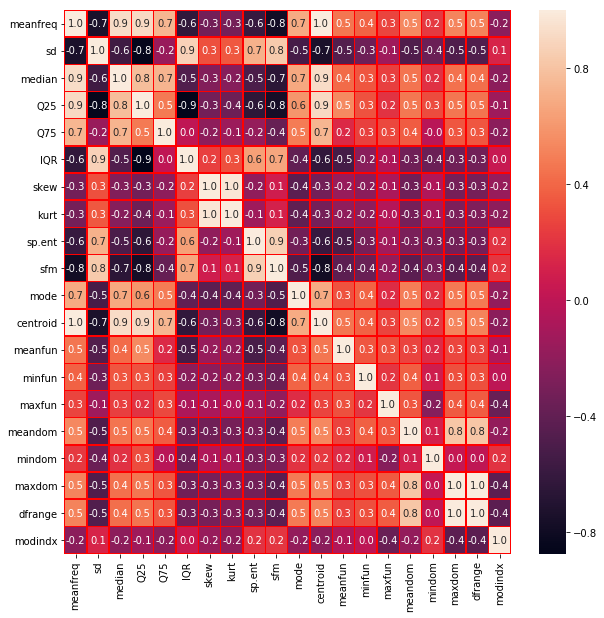

In [4]:
f, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="data_info"></a> 
## CHECKING DATA TYPES

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null int64
dtypes: float64(20), int64(1)
memory usage: 519.8 KB


<a id="con"></a>
## CONVERTING FEATURE TO INT
 As we can see "label" is "object". We can't use "object" for classifaciton problems. The Logistic Algortihm is has to be 2 situation. For this dataset our situatins is "man" or "woman" and there outputs has to be 0 or 1, so lets convert to "int". 

In [18]:
data.label= [1 if (each == 'male') else 0 for each in data.label] 

y= data.label.values
x_data= data.drop(["label"], axis=1)

 <a id="normalization"></a> 
 ## NORMALIZATION

In [7]:
x= (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values  # We scale numbers into 0 and 1 

<a id="split"></a> 
 ## TRAIN TEST SPLIT
  By using sklearn library we are spliting the data to %20 test and %80 train. 

In [8]:
from sklearn.model_selection import train_test_split 

# Random state will divide data to always same equality to 42 number. Its means anytime you dive to data its will  give to same result
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 42)

x_train= x_train.T
x_test= x_test.T
y_train= y_train.T
y_test= y_test.T

<a id="int"> </a> 
## INITIALIZING PARAMETERS

In [9]:
def init_weights_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

<a id="sigmoid"> </a> 
## IMPLEMENTING SIGMOID FUNCTION

![](http://cdn-images-1.medium.com/max/2000/1*JHWL_71qml0kP_Imyx4zBg.png)

 Looking at the graph, we can see that the given a number n, the sigmoid function would map that number between 0 and 1. 
 As the value of n gets larger, the value of the sigmoid function gets closer and closer to 1 and as n gets smaller, the value of the sigmoid function is get closer and closer to 0.

In [10]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

<a id=forward> </a> 
## FORWARD PROPAGATION

The cost or loss function has an important job in that it must faithfully distill all aspects of the model down into a single number in such a way that improvements in that number are a sign of a better model.

![](http://image.ibb.co/dFCR3H/6.jpg)

In [11]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_backward_propagation(w,b,x_train,y_train):
    # Forward Propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    # Cost is summary of all losses
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1] is count of all samples
    # Divide to sample size because of scaling
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

 <a id="update"> </a>
 ## UPDATING PARAMETERS(LEARNING)

In [12]:
def update_weights_bias(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"] 
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id="prediction"> </a> 
## PREDICTION

In [13]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="log"> </a> 
## LOGISTIC REGRESSION

Cost after iteration 0: 0.695733
Cost after iteration 10: 0.570587
Cost after iteration 20: 0.511070
Cost after iteration 30: 0.472310
Cost after iteration 40: 0.442741
Cost after iteration 50: 0.418369
Cost after iteration 60: 0.397485
Cost after iteration 70: 0.379209
Cost after iteration 80: 0.363009
Cost after iteration 90: 0.348522
Cost after iteration 100: 0.335479
Cost after iteration 110: 0.323672
Cost after iteration 120: 0.312932
Cost after iteration 130: 0.303120
Cost after iteration 140: 0.294122
Cost after iteration 150: 0.285840
Cost after iteration 160: 0.278192
Cost after iteration 170: 0.271109
Cost after iteration 180: 0.264530
Cost after iteration 190: 0.258403
Cost after iteration 200: 0.252683
Cost after iteration 210: 0.247332
Cost after iteration 220: 0.242314
Cost after iteration 230: 0.237600
Cost after iteration 240: 0.233163
Cost after iteration 250: 0.228979
Cost after iteration 260: 0.225027
Cost after iteration 270: 0.221289
Cost after iteration 280: 0.217

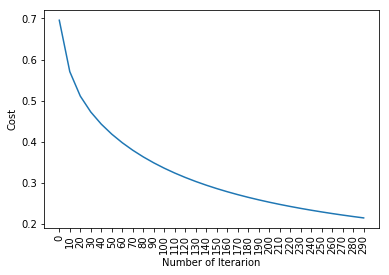

test accuracy: 97.1608832807571 %


In [14]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = init_weights_bias(dimension)

    parameters,gradients,cost_list = update_weights_bias(w,b,x_train,y_train,learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return y_prediction_test #Estimates for Complex Matrix
    
y_predict = logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=300)

<a id="viz"></a>
## VISUALIZATION OF RESULTS 
If we stack true and false predicts, we can easy visualize this values. 

In [15]:
predict = []
for i in range(0,1):
    for each in y_predict[i]:
        predict.append(int(each))

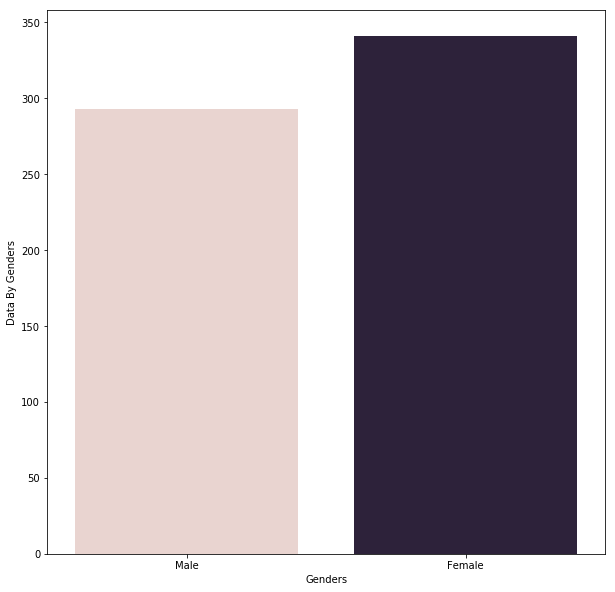

In [16]:
# Total predicted datas by gender
male=0
female=0
for i in range(y_predict.shape[1]):
    if y_predict[0][i] == 0:
        male= male+1
    else:
        female= female+1
        
x=["Male", "Female"]
y=[male, female]

plt.figure(figsize=(10,10))
sns.barplot(x=x, y=y, palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Genders")
plt.ylabel("Data By Genders")
plt.show()



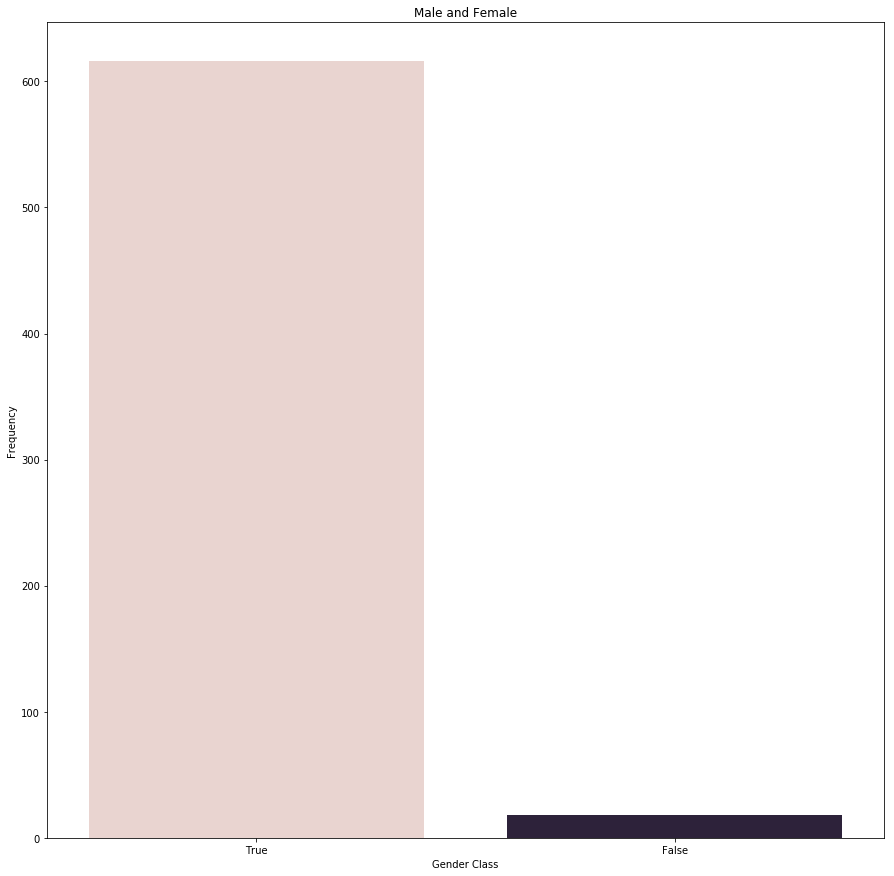

In [17]:
# We'll see how many data are predicted correctly. 
true_predict = 0
false_predict = 0
for x in range(len(predict)):
    for y in range(x,len(y_test)):
        if (predict[x] == y_test[y]):
            true_predict = true_predict +1
            break
        else:
            false_predict = false_predict +1
            break
            
# Visualization
x_Axis = ["True","False"]
y_Axis = [true_predict,false_predict]

plt.figure(figsize=(15,15))
sns.barplot(x=x_Axis,y=y_Axis,palette = sns.cubehelix_palette(len(x_Axis)))
plt.xlabel("Gender Class")
plt.ylabel("Frequency")
plt.title("Male and Female")
plt.show()            